# AFFINE TRANSFORM

In [15]:
import cv2
from utils import s
import matplotlib.pyplot as plt
import numpy as np

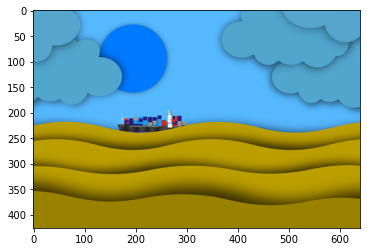

In [80]:
im = cv2.imread("input/trans.png",1)
s(im)

## ROTATION

In [18]:
"""
Experiment with different angle and scale
"""
height, width = im.shape[:2]
center = (width/2,height/2)


In [25]:
rotate_matrix = cv2.getRotationMatrix2D(center=center,angle=45,scale=1)
rotated_image_1 = cv2.warpAffine(src=im,M=rotate_matrix,dsize= (width,height))

In [26]:
rotate_matrix = cv2.getRotationMatrix2D(center=center,angle=45,scale=0.5)
rotated_image_2 = cv2.warpAffine(src=im,M=rotate_matrix,dsize= (width,height))

In [27]:
rotate_matrix = cv2.getRotationMatrix2D(center=center,angle=-45,scale=1)
rotated_image_3 = cv2.warpAffine(src=im,M=rotate_matrix,dsize= (width,height))

In [28]:
rotate_matrix = cv2.getRotationMatrix2D(center=center,angle=-45,scale=0.5)
rotated_image_4 = cv2.warpAffine(src=im,M=rotate_matrix,dsize= (width,height))

Text(0.5, 1.0, '')

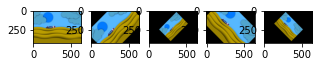

In [42]:
fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5,figsize=(5,3))
ax0.imshow(im)
ax1.imshow(rotated_image_1)
ax1.set_title("")
ax2.imshow(rotated_image_2)
ax2.set_title("")
ax3.imshow(rotated_image_3)
ax3.set_title("")
ax4.imshow(rotated_image_4)
ax4.set_title("")

## SCALING

(426, 640, 3)
(213, 320, 3)
(639, 960, 3)


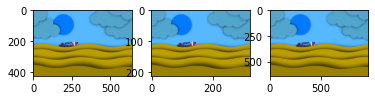

In [55]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3)
scale_percents = [50,150]
widths  = [int(im.shape[1]*scale_unit/100) for scale_unit in scale_percents ]
heights = [int(im.shape[0]*scale_unit/100) for scale_unit in scale_percents ]

dsizes = [(widths[i],heights[i]) for i in range(len(widths))]

scaled_images = [cv2.resize(im,dsize) for dsize in dsizes]
print(im.shape)
print(scaled_images[0].shape)
print(scaled_images[1].shape)

ax0.imshow(im)
ax1.imshow(scaled_images[0])
ax2.imshow(scaled_images[1])

## TRANSLATION

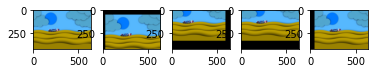

In [81]:
M = np.float32([[1,0,25],[0,1,50]])
shifted_1 = cv2.warpAffine(im,M,(im.shape[1],im.shape[0]))

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted_2 = cv2.warpAffine(im,M,(im.shape[1],im.shape[0]))

M = np.float32([[1, 0, 0], [0, 1, -90]])
shifted_3 = cv2.warpAffine(im,M,(im.shape[1],im.shape[0]))

M = np.float32([[1, 0, 50], [0, 1, 0]])
shifted_4 = cv2.warpAffine(im,M,(im.shape[1],im.shape[0]))

fig,axes = plt.subplots(1,5)
axes[0].imshow(im)
axes[1].imshow(shifted_1)
axes[2].imshow(shifted_2)
axes[3].imshow(shifted_3)
axes[4].imshow(shifted_4)

## SHEARING

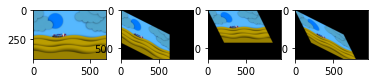

In [82]:
rows,cols = im.shape[:2]
M = np.float32([[1,0,0],
                       [0.5,1,0],
                       [0,0,1]])
sheared_img_1 = cv2.warpPerspective(im,M,(int(cols*1.5),int(rows*1.5)))

M = np.float32([[1,0.5,0],
                       [0,1,0],
                       [0,0,1]])
sheared_img_2 = cv2.warpPerspective(im,M,(int(cols*1.5),int(rows*1.5)))


M = np.float32([[1,0.5,0],
                       [0.5,1,0],
                       [0,0,1]])
sheared_img_3 = cv2.warpPerspective(im,M,(int(cols*1.5),int(rows*1.5)))

fig,axes = plt.subplots(1,4)
axes[0].imshow(im)
axes[1].imshow(sheared_img_1)
axes[2].imshow(sheared_img_2)
axes[3].imshow(sheared_img_3)

# PERSPECTIVE TRANSFORM

[[ 6.25000000e-01  0.00000000e+00 -0.00000000e+00]
 [ 3.55271368e-16  4.57142857e+00 -1.18857143e+03]
 [ 2.77555756e-19 -0.00000000e+00  1.00000000e+00]]


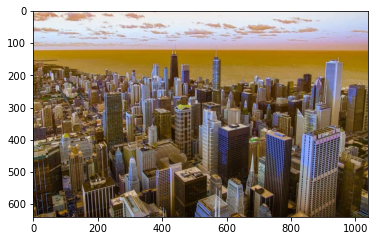

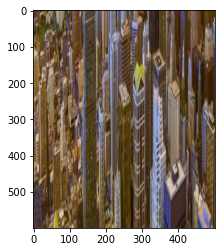

In [74]:
im = cv2.imread("input/city.jpg")
pts1 = np.float32([[0,260],[640,260],[640,400],[0,400]])
pts2 = np.float32([[0,0],[400,0],[400,640],[0,640]])

matrix = cv2.getPerspectiveTransform(pts1,pts2)
result = cv2.warpPerspective(im,matrix,(500,600))
s(im)
s(result)

# BACKWARD MAPPING

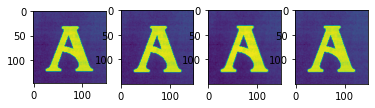

In [78]:
"""
ZERO ORDER
BILINEAR
CUBIC
"""
im = cv2.imread("input/forward.png",0)
nearest_im = cv2.resize(im,im.shape,0,0,interpolation=cv2.INTER_NEAREST)
linear_im = cv2.resize(im,im.shape,0,0,interpolation=cv2.INTER_LINEAR)
cubic_im = cv2.resize(im,im.shape,0,0,interpolation=cv2.INTER_CUBIC)
fig, ax = plt.subplots(1,4)
ax[0].imshow(im)
ax[1].imshow(nearest_im)
ax[2].imshow(linear_im)
ax[3].imshow(cubic_im)
# s(nearest_im)
# s(linear_im)
# s(cubic_im)